In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
#read and show data frame
df = pd.read_excel(r"C:\Users\garik\OneDrive\Desktop\Projects\Football Project\spi_matches_intl.xlsx")
df

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,0.2767,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,0.3608,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,0.2487,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,0.2699,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,0.3157,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68908,2023,2023-12-03,2105,Brasileiro Série A,Cruzeiro,Palmeiras,49.66,69.02,0.2741,0.4737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68909,2023,2023-12-03,2105,Brasileiro Série A,São Paulo,Flamengo,58.71,66.27,0.3936,0.3593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68910,2023,2023-12-03,2105,Brasileiro Série A,Santos,Fortaleza,50.66,53.06,0.4395,0.2724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68911,2023,2023-12-03,2105,Brasileiro Série A,Internacional,Botafogo,54.20,57.95,0.4283,0.2966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()
# there are null values in the columns "xg1", "xg2", "nsxg1", "nsxg2", "adj_score1", and "adj_score2" "importance1" "importance2"
# "score1" and "score2"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68913 entries, 0 to 68912
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   season       68913 non-null  int64         
 1   date         68913 non-null  datetime64[ns]
 2   league_id    68913 non-null  int64         
 3   league       68913 non-null  object        
 4   team1        68913 non-null  object        
 5   team2        68913 non-null  object        
 6   spi1         68913 non-null  float64       
 7   spi2         68913 non-null  float64       
 8   prob1        68913 non-null  float64       
 9   prob2        68913 non-null  float64       
 10  probtie      68913 non-null  float64       
 11  proj_score1  68913 non-null  float64       
 12  proj_score2  68913 non-null  float64       
 13  importance1  61122 non-null  float64       
 14  importance2  61122 non-null  float64       
 15  score1       66909 non-null  float64       
 16  scor

In [11]:
#Checking for the matches where the 'score1' or 'score2' was not recorded
df[df["score1"].isnull() | df["score2"].isnull()]

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
26854,2019,2019-11-02,2417,Scottish Premiership,Rangers,St Johnstone,71.98,29.23,0.8363,0.0462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29062,2019,2020-01-11,7921,FA Women's Super League,Liverpool Women,Manchester United Women,49.88,79.62,0.1711,0.6028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29666,2019,2020-02-01,7921,FA Women's Super League,Liverpool Women,Birmingham City,49.88,34.45,0.6186,0.1514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29894,2019,2020-02-09,7921,FA Women's Super League,Birmingham City,Brighton & Hove Albion,34.45,36.64,0.4267,0.3205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29895,2019,2020-02-09,7921,FA Women's Super League,Bristol Academy,Reading,27.98,34.30,0.3894,0.3720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68908,2023,2023-12-03,2105,Brasileiro Série A,Cruzeiro,Palmeiras,49.66,69.02,0.2741,0.4737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68909,2023,2023-12-03,2105,Brasileiro Série A,São Paulo,Flamengo,58.71,66.27,0.3936,0.3593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68910,2023,2023-12-03,2105,Brasileiro Série A,Santos,Fortaleza,50.66,53.06,0.4395,0.2724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68911,2023,2023-12-03,2105,Brasileiro Série A,Internacional,Botafogo,54.20,57.95,0.4283,0.2966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#drop matches where there are no scores recorded
df = df.dropna(subset=["score1", "score2"])

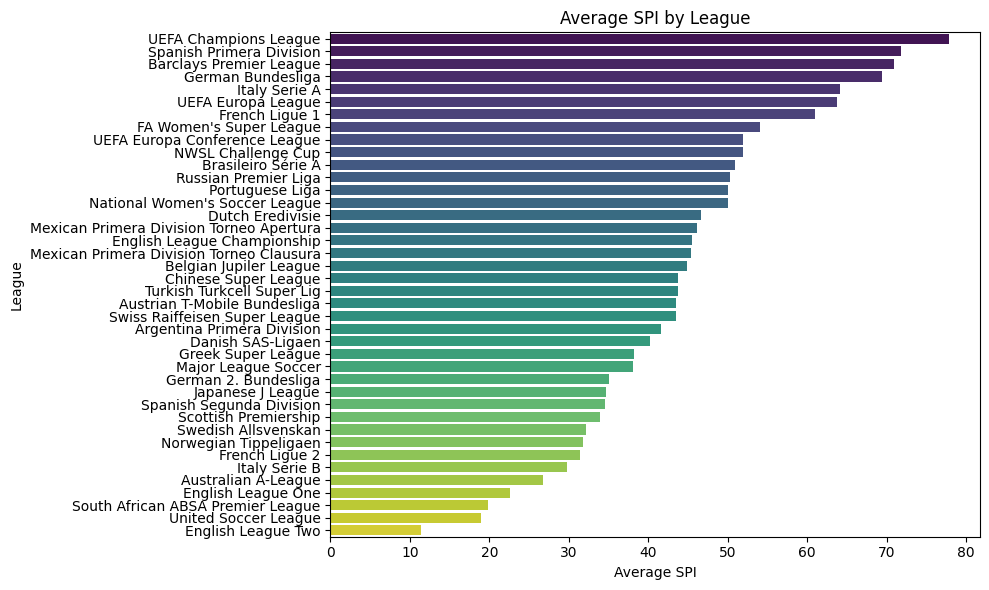

In [21]:
team1_df = df[['team1', 'spi1', 'league']].rename(columns={'team1':'team', 'spi1':'spi'})
team2_df = df[['team2', 'spi2', 'league']].rename(columns={'team2':'team', 'spi2':'spi'})
all_teams_df = pd.concat([team1_df, team2_df])

# Calculate the average SPI by league
average_spi_by_league = all_teams_df.groupby('league')['spi'].mean()

# Sort the average SPIs of leagues in descending order
average_spi_sorted = average_spi_by_league.sort_values(ascending=False)

# Reset index to convert the series into a DataFrame
average_spi_sorted = average_spi_sorted.reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='spi', y='league', data=average_spi_sorted, palette='viridis')
plt.xlabel('Average SPI')
plt.ylabel('League')
plt.title('Average SPI by League')
plt.tight_layout()
plt.show()
# Besides the UEFA Champions League as it is a combination of the best teams in europe
#The Spanish Primera Division has the highest 'Average SPI by League' over the years 2016-2023

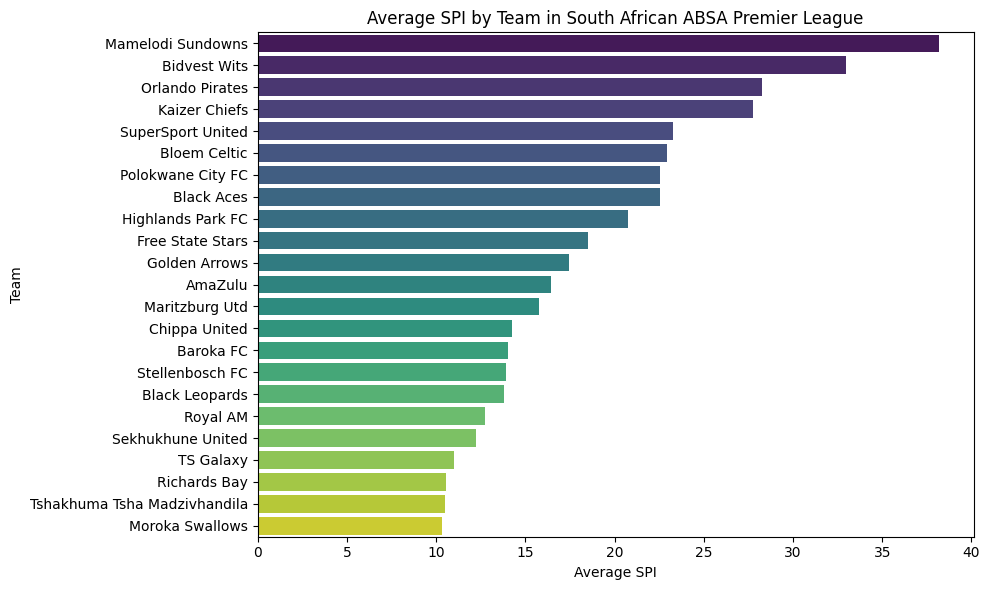

In [22]:
team1_df = df[['team1', 'spi1', 'league']].rename(columns={'team1':'team', 'spi1':'spi'})
team2_df = df[['team2', 'spi2', 'league']].rename(columns={'team2':'team', 'spi2':'spi'})
all_teams_df = pd.concat([team1_df, team2_df])
average_spi_by_league = all_teams_df.groupby(['league', 'team'])['spi'].mean()

# Get the average SPIs of teams in the 'South African ABSA Premier League' in descending order
average_spi_absa = average_spi_by_league['South African ABSA Premier League'].sort_values(ascending=False)

# Reset index to convert the series into a DataFrame
average_spi_absa = average_spi_absa.reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='spi', y='team', data=average_spi_absa, palette='viridis')
plt.xlabel('Average SPI')
plt.ylabel('Team')
plt.title('Average SPI by Team in South African ABSA Premier League')
plt.tight_layout()
plt.show()
#Mamelodi Sundowns is the best team in South Africa and Moroka Swallows has been the worst team over the 2016-2022 period

In [25]:
df[df['league'] == "South African ABSA Premier League"]

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
11579,2018,2018-08-04,1983,South African ABSA Premier League,Mamelodi Sundowns,Kaizer Chiefs,48.74,34.25,0.5335,0.1983,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
11627,2018,2018-08-04,1983,South African ABSA Premier League,Bidvest Wits,Free State Stars,28.72,21.40,0.4830,0.2332,...,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
11628,2018,2018-08-04,1983,South African ABSA Premier League,Black Aces,SuperSport United,26.19,25.13,0.4126,0.2738,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
11629,2018,2018-08-04,1983,South African ABSA Premier League,Black Leopards,Polokwane City FC,12.25,23.25,0.2546,0.4673,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
11637,2018,2018-08-04,1983,South African ABSA Premier League,Orlando Pirates,Highlands Park FC,36.92,15.04,0.6960,0.1105,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66791,2022,2023-05-20,1983,South African ABSA Premier League,Chippa United,Golden Arrows,8.67,13.27,0.4227,0.2926,...,100.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
66793,2022,2023-05-20,1983,South African ABSA Premier League,Stellenbosch FC,TS Galaxy,18.80,16.41,0.3627,0.3052,...,0.0,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
66796,2022,2023-05-20,1983,South African ABSA Premier League,Richards Bay,Royal AM,8.28,13.19,0.3374,0.3545,...,3.7,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
66797,2022,2023-05-20,1983,South African ABSA Premier League,Moroka Swallows,Tshakhuma Tsha Madzivhandila,9.78,11.05,0.2881,0.3601,...,0.0,100.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df2 = df[df['league'] == "South African ABSA Premier League"]
df2.loc[:, 'spi_avg'] = df2[['spi1', 'spi2']].mean(axis=1)


# Group by 'season' and calculate the mean of 'spi_avg'
season_spi_avg = df2.groupby('season')['spi_avg'].mean()

season_spi_avg

season
2018    25.301063
2019    22.245188
2021    15.574167
2022    16.085104
Name: spi_avg, dtype: float64

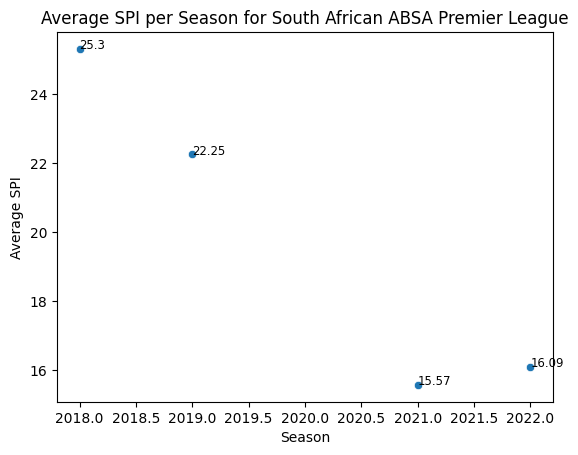

In [28]:
# Reset the index to make 'season' a column in the DataFrame
season_spi_avg = season_spi_avg.reset_index()

# Create a scatter plot
plot = sns.scatterplot(data=season_spi_avg, x='season', y='spi_avg')

# Annotate SPI values on the plot
for line in range(0,season_spi_avg.shape[0]):
     plot.text(season_spi_avg.season[line], season_spi_avg.spi_avg[line], 
               round(season_spi_avg.spi_avg[line], 2), horizontalalignment='left', 
               size='small', color='black')
plt.xlabel('Season')
plt.ylabel('Average SPI')
plt.title('Average SPI per Season for South African ABSA Premier League')

# Show the plot
plt.show()
#The quality of South African football has been decreasing over the years

In [29]:
df2.info()
#No xg records present for the South African ABSA Premier League
# Will analyse another league

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 11579 to 66798
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   season       876 non-null    int64         
 1   date         876 non-null    datetime64[ns]
 2   league_id    876 non-null    int64         
 3   league       876 non-null    object        
 4   team1        876 non-null    object        
 5   team2        876 non-null    object        
 6   spi1         876 non-null    float64       
 7   spi2         876 non-null    float64       
 8   prob1        876 non-null    float64       
 9   prob2        876 non-null    float64       
 10  probtie      876 non-null    float64       
 11  proj_score1  876 non-null    float64       
 12  proj_score2  876 non-null    float64       
 13  importance1  773 non-null    float64       
 14  importance2  773 non-null    float64       
 15  score1       876 non-null    float64       
 16  score2 